In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# mount google drive to colab
from google.colab import drive
import os
n=20
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/My Drive/

# "G:\My Drive\finaldf_v3.csv"
print("###\n### {}".format(os.getcwd()))
print("#" * n)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
####################
### colabs default working directory
###
### path: /content
####################
### setted working directory
/content/drive/My Drive
###
### /content/drive/My Drive
####################


In [ ]:
cols = ['nums', 
'oov_rank', 
'stop_word', 
'oov_rank_no_punc', 
'punct_lemm', 
'punct', 
'word_len_no_punc', 
'word_len', 
'basic_rank_no_punc', 
'word_count_no_punct', 
'word_count', 
'sent_len', 
'aol_rank_no_punc_perc', 
'aol_rank_perc', 
'concreteness_rank_no_punc_perc', 
'concreteness_rank_perc',
'basic_rank', 
'mid_con', 
'bot_aol', 
'mid_aol', 
'top_aol', 
'bot_con', 
'top_con', 
'basic_sim',
'label',
'original_text']

In [ ]:
df = pd.read_csv(r'finaldf_v3.csv')
df = df.drop(columns=['Unnamed: 0',	'Unnamed: 0.1'])
import numpy as np


df= df[cols]

df = df.sample(frac=0.7, random_state=22)
train_df, dev_df, test_df = \
              np.split(df.sample(frac=1, random_state=22), 
                       [int(.8*len(df)), int(.9*len(df))])

In [ ]:
>>> from sklearn.impute import SimpleImputer

y_train = train_df['label']
y_test= test_df['label']
y_dev = dev_df['label']

train_df = train_df.drop(columns='label')
train_df_num = train_df.select_dtypes('number')
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df_num = pd.DataFrame(imp_mean.fit_transform(train_df_num), columns=train_df_num.columns)

In [ ]:
X_train = train_df_num

In [ ]:
dev_df_num = dev_df.select_dtypes('number').drop(columns='label')
test_df_num = test_df.select_dtypes('number').drop(columns='label')


dev_df_trans = pd.DataFrame(imp_mean.transform(dev_df_num), columns=train_df_num.columns)
test_df_trans = pd.DataFrame(imp_mean.transform(test_df_num), columns=train_df_num.columns)


X_dev = dev_df_trans


X_test = test_df_trans


In [ ]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer, PorterStemmer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

bigram_vectorizer = TfidfVectorizer(tokenizer=tokenize,
                                strip_accents = 'unicode', # works 
                                stop_words = 'english', # works
                                lowercase = True, # works
                                max_features = 3000,
                                ngram_range=(1,4)) # works

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# len(X_test.to_numpy())
# len(X_test_word.todense())

In [ ]:
# bigram_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, ngram_range=(1,2))
X_train_word = bigram_vectorizer.fit_transform(train_df.original_text)

X_test_word = bigram_vectorizer.transform(test_df.original_text)
X_dev_word = bigram_vectorizer.transform(dev_df.original_text)
X_train_final = np.concatenate((X_train_word.todense(), X_train.to_numpy()), axis=1)
X_test_final = np.concatenate((X_test_word.todense(), X_test.to_numpy()), axis=1)
X_dev_final = np.concatenate((X_dev_word.todense(), X_dev.to_numpy()), axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [ ]:
X_train_word.shape

(233390, 2000)

In [ ]:
# np.savez('X_test_final.npz', X_test_final)

In [ ]:
# import pickle
# with open('y_train.pickle', 'wb') as f:
#   pickle.dump(y_train,f )
# with open('y_dev.pickle', 'wb') as f:
#   pickle.dump(y_dev, f )
# with open('y_test.pickle', 'wb') as f:
#   pickle.dump(y_test, f )


In [ ]:
# X_test_word = 0
# X_test_word = 0

# X_train_final = np.load('X_train_final.npz')

In [ ]:
# X_train_final = X_train_final['arr_0']

In [ ]:
from sklearn.preprocessing import  MinMaxScaler 
from sklearn.preprocessing import  StandardScaler

scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)
X_dev_final = scaler.transform(X_dev_final)

# scaler = StandardScaler()
# X_train_final = scaler.fit_transform(X_train_final)
# X_test_final = scaler.transform(X_test_final)
# X_dev_final = scaler.transform(X_dev_final)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:


import tensorflow as tf
from os import path, getcwd, chdir
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>=0.95):
            print(' Reached 70% accuracy so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()

def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE



    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        keras.layers.Dense(500, activation= tf.nn.relu, input_shape=(X_train_word.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(100, activation= tf.nn.relu),
        keras.layers.Dense(20, activation= tf.nn.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation= 'sigmoid'),
        
        # YOUR CODE SHOULD START HERE
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    model.fit(X_train_word.todense(), y_train.to_numpy(), epochs=100, callbacks=[callbacks], validation_data = (X_test_word.todense(), y_test.to_numpy())
    )
    
    # model fitting
    # history = model.fit(X_train_final, y_train.to_numpy(), epochs=10, callbacks=[callbacks], validation_data = (X_test_final, y_test.to_numpy())
    # )
    # model fitting
    return history   #history.epoch, history.history['accuracy'][-1], history.history['accuracy'][-2]
model = train_mnist()


 

Epoch 1/100
7294/7294 [==============================] - 97s 13ms/step - loss: 0.5991 - accuracy: 0.6698 - val_loss: 0.5741 - val_accuracy: 0.6868
Epoch 2/100
7294/7294 [==============================] - 89s 12ms/step - loss: 0.5683 - accuracy: 0.6980 - val_loss: 0.5648 - val_accuracy: 0.6974
Epoch 3/100
7294/7294 [==============================] - 89s 12ms/step - loss: 0.5436 - accuracy: 0.7208 - val_loss: 0.5641 - val_accuracy: 0.6971
Epoch 4/100
1888/7294 [======>.......................] - ETA: 1:03 - loss: 0.4992 - accuracy: 0.7556

KeyboardInterrupt: ignored

In [ ]:


import tensorflow as tf
from os import path, getcwd, chdir
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>=0.95):
            print(' Reached 70% accuracy so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()
#callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE



    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        keras.layers.Dense(20, activation= tf.nn.relu, input_shape=(X_train_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation= tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation= 'sigmoid'),
        
        # YOUR CODE SHOULD START HERE
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    history = model.fit(X_train_final, y_train.to_numpy(), epochs=30, callbacks=[callbacks], validation_data = (X_dev_final, y_dev.to_numpy())
    )
    
    # model fitting
    # history = model.fit(X_train_final, y_train.to_numpy(), epochs=10, callbacks=[callbacks], validation_data = (X_test_final, y_test.to_numpy())
    # )
    # model fitting
    return history   #history.epoch, history.history['accuracy'][-1], history.history['accuracy'][-2]
model = train_mnist()


 

Epoch 1/30
7294/7294 [==============================] - 21s 3ms/step - loss: 0.5871 - accuracy: 0.6783 - val_loss: 0.5617 - val_accuracy: 0.6967
Epoch 2/30
7294/7294 [==============================] - 20s 3ms/step - loss: 0.5602 - accuracy: 0.7019 - val_loss: 0.5578 - val_accuracy: 0.6965
Epoch 3/30
7294/7294 [==============================] - 20s 3ms/step - loss: 0.5492 - accuracy: 0.7119 - val_loss: 0.5545 - val_accuracy: 0.7020
Epoch 4/30
7294/7294 [==============================] - 20s 3ms/step - loss: 0.5405 - accuracy: 0.7184 - val_loss: 0.5548 - val_accuracy: 0.6994
Epoch 5/30
7294/7294 [==============================] - 20s 3ms/step - loss: 0.5336 - accuracy: 0.7241 - val_loss: 0.5543 - val_accuracy: 0.6993
Epoch 6/30
2267/7294 [========>.....................] - ETA: 12s - loss: 0.5221 - accuracy: 0.7333

KeyboardInterrupt: ignored

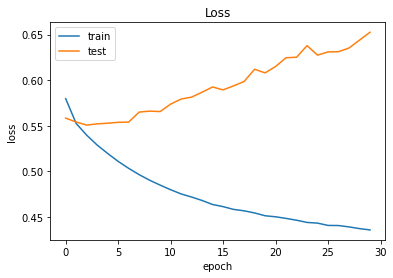

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show();

In [ ]:
model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                90750     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 91,551
Trainable params: 91,551
Non-trainable params: 0
_________________________________________________________________


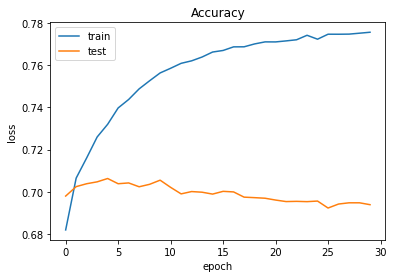

In [ ]:
plt.title('Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show();

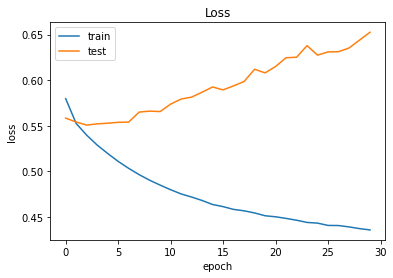

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show();

In [ ]:
model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                90750     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 91,551
Trainable params: 91,551
Non-trainable params: 0
_________________________________________________________________


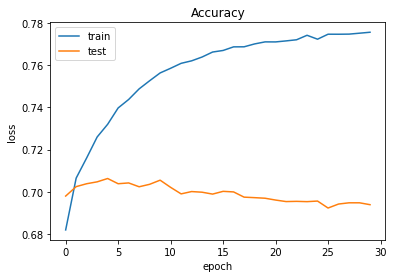

In [ ]:
plt.title('Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show();

In [ ]:


import tensorflow as tf
from os import path, getcwd, chdir
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>=0.95):
            print(' Reached 70% accuracy so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE



    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        keras.layers.Dense(1200, activation= tf.nn.relu, input_shape=(X_train_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(350, activation= tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(350, activation= tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(100, activation= tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(50, activation= tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation= 'sigmoid'),
        
        # YOUR CODE SHOULD START HERE
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    model.fit(X_train_final, y_train.to_numpy(), epochs=100, callbacks=[callbacks], validation_data = (X_dev_final, y_dev.to_numpy())
    )
    
    # model fitting
    # history = model.fit(X_train_final, y_train.to_numpy(), epochs=10, callbacks=[callbacks], validation_data = (X_test_final, y_test.to_numpy())
    # )
    # model fitting
    return model   #history.epoch, history.history['accuracy'][-1], history.history['accuracy'][-2]
model = train_mnist()


 

Epoch 1/100
7294/7294 [==============================] - 104s 14ms/step - loss: 0.5854 - accuracy: 0.6772 - val_loss: 0.5626 - val_accuracy: 0.6927
Epoch 2/100
7294/7294 [==============================] - 103s 14ms/step - loss: 0.5621 - accuracy: 0.6978 - val_loss: 0.5565 - val_accuracy: 0.6954
Epoch 3/100
7294/7294 [==============================] - 103s 14ms/step - loss: 0.5485 - accuracy: 0.7075 - val_loss: 0.5518 - val_accuracy: 0.7033
Epoch 4/100
7294/7294 [==============================] - 107s 15ms/step - loss: 0.5345 - accuracy: 0.7202 - val_loss: 0.5511 - val_accuracy: 0.7031
Epoch 5/100
7294/7294 [==============================] - 103s 14ms/step - loss: 0.5173 - accuracy: 0.7331 - val_loss: 0.5543 - val_accuracy: 0.7013
Epoch 6/100
7294/7294 [==============================] - 103s 14ms/step - loss: 0.4991 - accuracy: 0.7469 - val_loss: 0.5539 - val_accuracy: 0.6999


In [ ]:


import tensorflow as tf
from os import path, getcwd, chdir
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>=0.95):
            print(' Reached 70% accuracy so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()

def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE



    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        keras.layers.Input(shape=(X_train_word.shape[1])),
        keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                            input_shape= [None]),
        keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation= 'sigmoid'),
        
        # YOUR CODE SHOULD START HERE
 
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    

    model.fit(X_train_word.todense(), y_train.to_numpy(), epochs=10, callbacks=[callbacks], validation_data = (X_test_word.todense(), y_test.to_numpy())
    )
    
    # model fitting
    # history = model.fit(X_train_final, y_train.to_numpy(), epochs=10, callbacks=[callbacks], validation_data = (X_test_final, y_test.to_numpy())
    # )
    # model fitting
    return model   #history.epoch, history.history['accuracy'][-1], history.history['accuracy'][-2]
model = train_mnist()


 

Epoch 1/10
  62/7294 [..............................] - ETA: 2:28:30 - loss: 0.6927 - accuracy: 0.5081

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv(r'finaldf_v3.csv')
df = df.drop(columns=['Unnamed: 0',	'Unnamed: 0.1'])
import numpy as np


df= df[['original_text','label']].rename(columns={'original_text':'text'})

# df = df.sample(frac=0.7, random_state=22)
# train_df, dev_df, test_df = \
#               np.split(df.sample(frac=1, random_state=22), 
#                        [int(.8*len(df)), int(.9*len(df))])

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 125
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS,  lower=True)
tokenizer.fit_on_texts(df['original_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 129372 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['original_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y= df['label']
print('Shape of data tensor:', X.shape)

Shape of data tensor: (291738, 125)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(262564, 125) (262564,)
(29174, 125) (29174,)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 125, 100)          5000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 125, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
3693/3693 [==============================] - 992s 268ms/step - loss: 0.5819 - accuracy: 0.6838 - val_loss: 0.5619 - val_accuracy: 0.6943
Epoch 2/5
3693/3693 [==============================] - 988s 267ms/step - loss: 0.5143 - accuracy: 0.7368 - val_loss: 0.5649 - val_accuracy: 0.6983
Epoch 3/5
3693/3693 [==============================] - 990s 268ms/step - loss: 0.4593 - accuracy: 0.7696 - val_loss: 0.5910 - val_accuracy: 0.6887
Epoch 4/5
3693/3693 [==============================] - 981s 266ms/step - loss: 0.4103 - accuracy: 0.7979 - val_loss: 0.6538 - val_accuracy: 0.6804


In [ ]:
df[['bot_aol','mid_con']].values

array([[-0.04765163, -0.05230722],
       [-0.14023231, -0.14639366],
       [-0.25344631, -0.23067948],
       ...,
       [-0.16751267, -0.14417347],
       [-0.19544052, -0.22694729],
       [-0.32876498, -0.4098359 ]])